In [1]:
import tensorflow as tf
import numpy as np
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import pathlib

from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from skimage.io import imsave, imread
from tensorflow.keras import datasets, layers, models

# Data Preprocessing

### For unhealthy sets

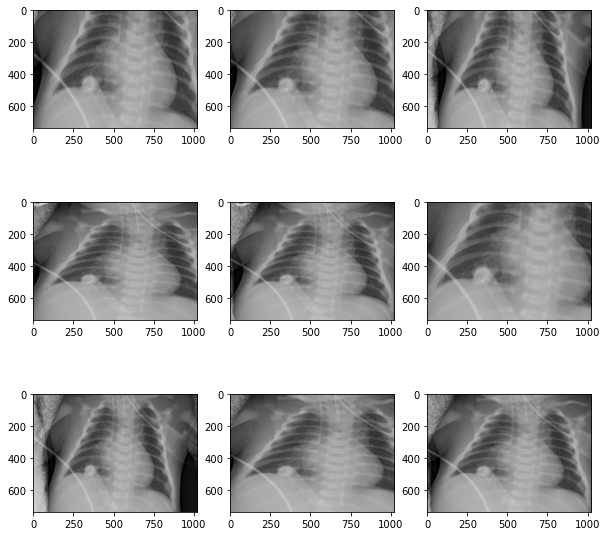

In [2]:
def zoomImgGenerator(loadPath, saveFileName):
    img = load_img(loadPath)
    data = img_to_array(img)
    samples = expand_dims(data, 0)
    datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
    imageIterations = datagen.flow(samples, batch_size=1)
    plt.figure(figsize=(10, 10))
    c=0
    for i in range(9):
        c+=1
        plt.subplot(330 + 1 + i)
        batch = imageIterations.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
#         imsave(f"{saveFileName}_{c}.jpeg", image)
    plt.show()
    
loadPath="archive\\train\\pneumonia\\person19_bacteria_59.jpeg"
saveFileName="augmented_person19_bacteria_59"
zoomImgGenerator(loadPath, saveFileName)

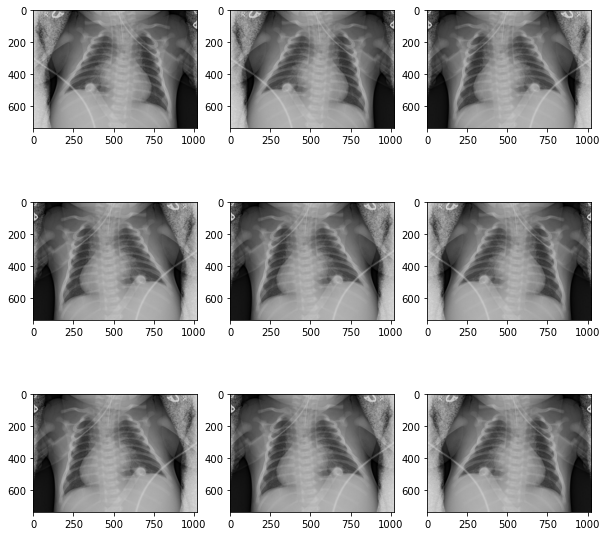

In [3]:
def horizntlFlip(loadPath, saveFileName):
    img = load_img(loadPath)
    data = img_to_array(img)
    samples = expand_dims(data, 0)
    datagen = ImageDataGenerator(horizontal_flip=True)
    imageIterations = datagen.flow(samples, batch_size=1)
    c=0
    plt.figure(figsize=(10, 10))
    for i in range(9):
        c+=1
        plt.subplot(330 + 1 + i)
        batch = imageIterations.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
#         imsave(f"{saveFileName}_{c}_Flipped.jpeg", image)
    # show the figure
    plt.show()
    
loadPath="archive\\train\\pneumonia\\person19_bacteria_59.jpeg"
saveFileName="augmented_person19_bacteria_59"
horizntlFlip(loadPath, saveFileName)

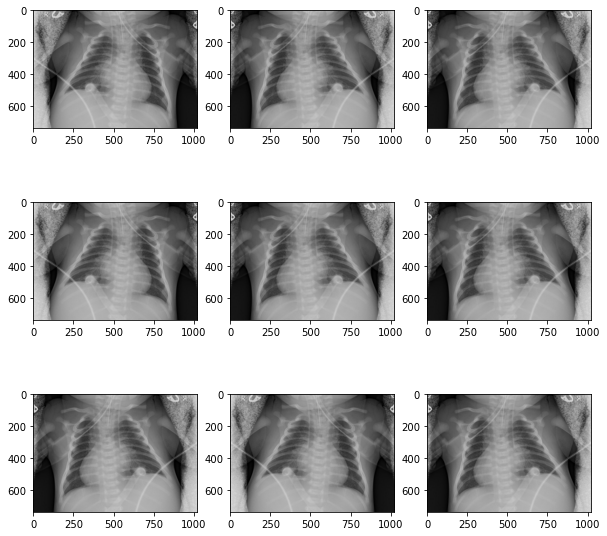

In [4]:
def zoomWHorzflp(loadPath, saveFileName):
    img = load_img(loadPath)
    data = img_to_array(img)
    samples = expand_dims(data, 0)
    datagen = ImageDataGenerator(  zoom_range=0.4, horizontal_flip=True)
    imageIterations = datagen.flow(samples, batch_size=1)
    plt.figure(figsize=(10, 10))
    c=0
    for i in range(9):
        c+=1
        plt.subplot(330 + 1 + i)
        batch = imageIterations.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
#         imsave(f"{saveFileName}_{c}_Flipped.jpeg", image)
    plt.show()
    
loadPath="archive\\train\\pneumonia\\person19_bacteria_59.jpeg"
saveFileName="augmented_person19_bacteria_59_1"
horizntlFlip(loadPath, saveFileName)

## For Healthy Sets

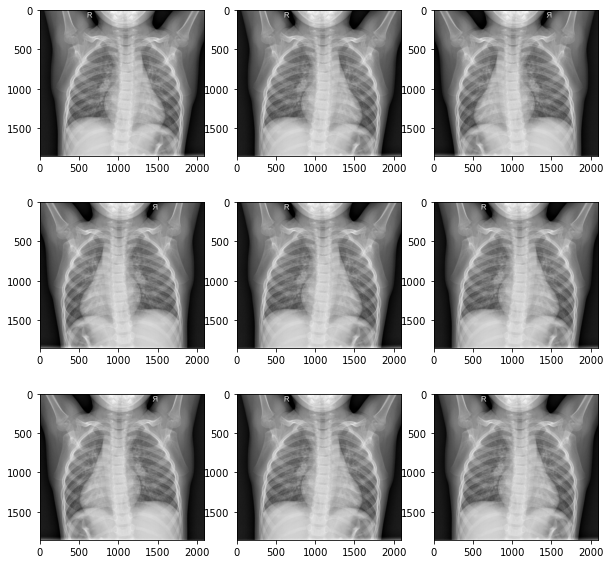

In [5]:
loadPath="archive\\train\\normal\\IM-0115-0001.jpeg"
saveFileName="IM-0115-0001"
horizntlFlip(loadPath, saveFileName)

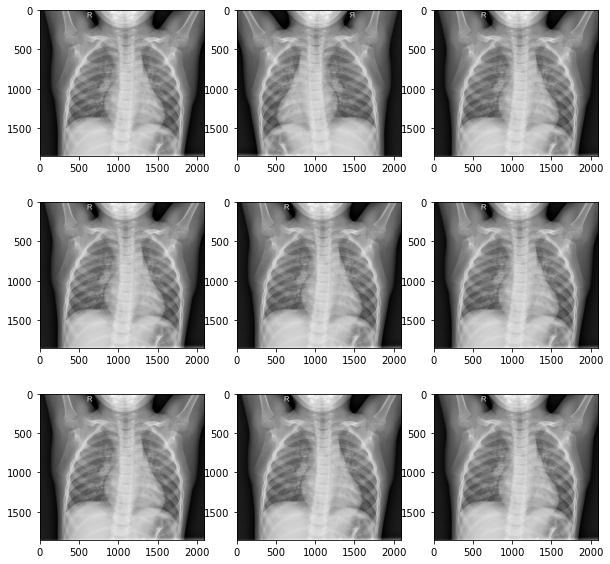

In [9]:
def zoomHealthy(loadPath, saveFileName):
    img = load_img('E:\Projects\Data_Augmentation_DeepSLIIT\IM-0115-0001_1_Flipped.jpeg')
    data = img_to_array(img)
    samples = expand_dims(data, 0)
    datagen = ImageDataGenerator(zoom_range=[0.6,1])
    imageIterations = datagen.flow(samples, batch_size=1)
    plt.figure(figsize=(10, 10))
    c=0
    for i in range(9):
        c+=1
        plt.subplot(330 + 1 + i)
        batch = imageIterations.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
#         imsave(f"{saveFileName}_{c}.jpeg", image)
    plt.show()
loadPath="Good augmentations\\train\\normal\\IM-0115-0001_1_Flipped.jpeg" #An Augmented image already
saveFileName="IM-0115-0001_4"
horizntlFlip(loadPath, saveFileName)

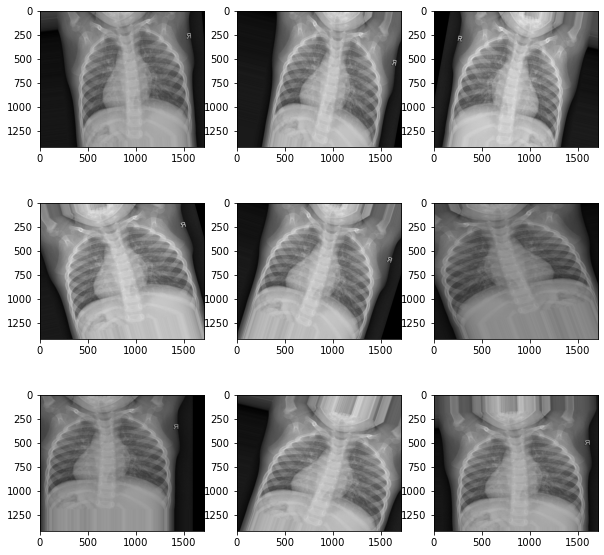

In [11]:
def multiple(loadPath, saveFileName):
    img = load_img(loadPath)
    data = img_to_array(img)
    samples = expand_dims(data, 0)
    datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, 
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, 
                             fill_mode="nearest", brightness_range=[0.6,1.0])
    imageIterations = datagen.flow(samples, batch_size=1)
    plt.figure(figsize=(10, 10))
    c=0
    for i in range(9):
        c+=1
        plt.subplot(330 + 1 + i)
        batch = imageIterations.next()
        image = batch[0].astype('uint8')
        plt.imshow(image)
#         imsave(f"{saveFileName}_{c}.jpeg", image)
    plt.show()

loadPath="archive\\train\\normal\\IM-0297-0001.jpeg" #An Augmented image already
saveFileName="IM-0297-0001_all"
multiple(loadPath, saveFileName)

# Obtaining Data

In [35]:
directory="archive/train"
directory_val="archive/val"

In [36]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory,
    labels="inferred",
    label_mode="int",
    image_size=(256, 256),
    crop_to_aspect_ratio=True,
    seed=42, 
    interpolation="bilinear",
    batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  directory_val,
    labels="inferred",
    label_mode="int",
    image_size=(256, 256),
    crop_to_aspect_ratio=True,
    seed=42, 
    interpolation="bilinear",
    batch_size=32)


Found 5248 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


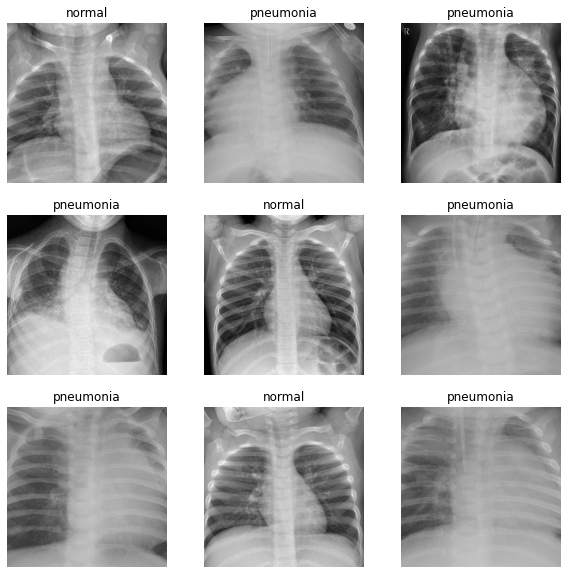

In [6]:

class_names = train_ds.class_names
# print(class_names)
c=0
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
#     print(f"Here are image metrics: {labels.shape}")
    for i in range(9):
        c+=1
        ax = plt.subplot(3 ,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        


# Building & Training the CNN

In [15]:

def build_CNN():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (4, 4),padding="same", activation='relu', input_shape=(256, 256, 3)))
    model.add(layers.MaxPooling2D((4, 4)))
    model.add(layers.Conv2D(64, (4, 4),padding="same", activation='relu'))
    model.add(layers.MaxPooling2D((4, 4)))
    model.add(layers.Conv2D(64, (4, 4),padding="same", activation='relu'))
    model.add(layers.MaxPooling2D((4, 4)))
#     input_shape = (None, 256, 256, 3)
    model.add(layers.BatchNormalization(   
        momentum=0.9,
        epsilon=0.1))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2, input_shape=(64,)))
    model.add(layers.Dense(32))
    model.summary()
    return model

In [16]:
model=build_CNN()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        65600     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        65600     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [10]:
# model.add(layers.BatchNormalization(   
#     momentum=0.9,
#     epsilon=0.1))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.2, input_shape=(64,)))
# model.add(layers.Dense(32))


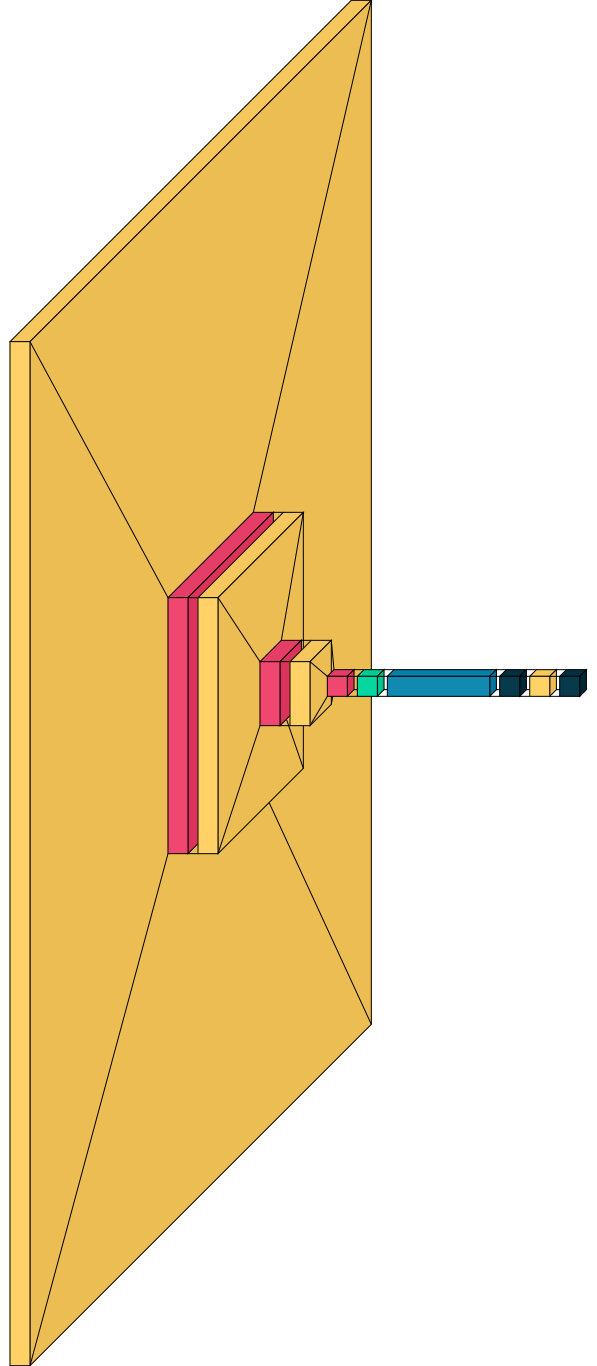

In [17]:
import visualkeras
visualkeras.layered_view(model)

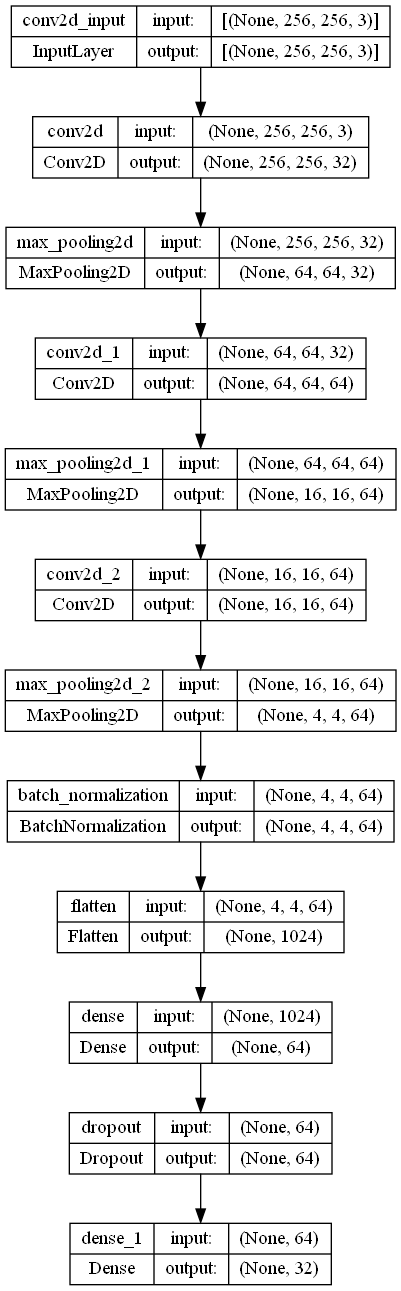

In [18]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
# CategoricalCrossentropy = tf.keras.losses.CategoricalCrossentropy(
#     from_logits=True,
#     label_smoothing=0.0,
#     axis=-1,
#     reduction="auto",
#     name="categorical_crossentropy",
# )

Adam = tf.keras.optimizers.Adam(
    learning_rate=0.003
)

model.compile(optimizer=Adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


modelTrained = model.fit(train_ds, epochs=50, 
                    validation_data=(val_ds))


Epoch 1/50
164/164 [==============================] - 145s 872ms/step - loss: 0.2153 - accuracy: 0.9280 - val_loss: 0.3897 - val_accuracy: 0.8125
Epoch 2/50
164/164 [==============================] - 146s 880ms/step - loss: 0.1260 - accuracy: 0.9539 - val_loss: 4.2965 - val_accuracy: 0.5000
Epoch 3/50
164/164 [==============================] - 145s 877ms/step - loss: 0.1048 - accuracy: 0.9617 - val_loss: 0.7214 - val_accuracy: 0.6875
Epoch 4/50
164/164 [==============================] - 144s 872ms/step - loss: 0.0896 - accuracy: 0.9668 - val_loss: 0.4495 - val_accuracy: 0.8125
Epoch 5/50
164/164 [==============================] - 145s 875ms/step - loss: 0.0856 - accuracy: 0.9676 - val_loss: 0.4521 - val_accuracy: 0.7500
Epoch 6/50
164/164 [==============================] - 144s 873ms/step - loss: 0.0783 - accuracy: 0.9703 - val_loss: 0.3771 - val_accuracy: 0.9375
Epoch 7/50
164/164 [==============================] - 145s 875ms/step - loss: 0.0634 - accuracy: 0.9758 - val_loss: 0.3637 -

# Analysis

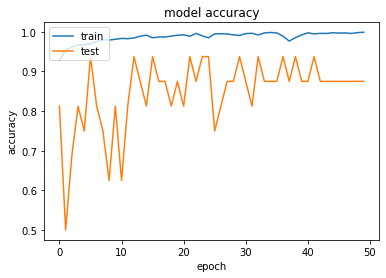

In [14]:
# summarize history for accuracy
plt.plot(modelTrained.history['accuracy'])
plt.plot(modelTrained.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


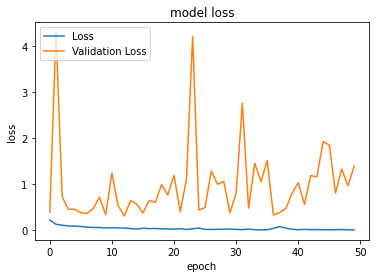

In [10]:
# summarize history for loss
plt.plot(modelTrained.history['loss'])
plt.plot(modelTrained.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')
plt.show()

In [8]:
import pickle
trained_model = tf.keras.models.load_model('my_model4.keras')
filename = 'history4.sav'
loadedhistory1_model = pickle.load(open(filename, 'rb'))


Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-09-27 22:45:18         5220
metadata.json                                  2023-09-27 22:45:18           64
variables.h5                                   2023-09-27 22:45:20      2059720
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper

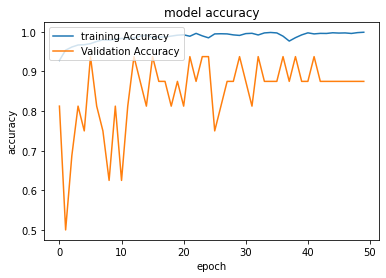

In [9]:
# summarize history for accuracy
plt.plot(loadedhistory1_model.history['accuracy'])
plt.plot(loadedhistory1_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()


In [25]:
directory_test="archive/test"

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory_test,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False)

test_loss, test_acc = trained_model.evaluate(test_ds, verbose=2)

print('\nTest accuracy:', test_acc)


Found 624 files belonging to 2 classes.
20/20 - 5s - loss: 1.9975 - accuracy: 0.8718 - 5s/epoch - 262ms/step

Test accuracy: 0.8717948794364929


In [20]:
from tensorflow.keras.preprocessing import image

img_path ="archive\\test\\pneumonia\\person1_virus_6.jpeg"
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = trained_model.predict(img_array) 
pred_array = np.argmax(predictions)
if(pred_array==1):
    print('XRAY Shows unhealthy characteristics: {0}'.format(pred_array))  
else:
    print('XRAY Shows healthy characteristics: {0}'.format(pred_array))  

1/1 [==============================] - 0s 157ms/step
XRAY Shows unhealthy characteristics: 1


In [26]:
features = []
labels = []

for feature_batch, label_batch in test_ds:
    features.extend(feature_batch.numpy())
    labels.extend(label_batch.numpy())

features = np.array(features)
labels = np.array(labels)


In [33]:
from sklearn.metrics import classification_report

predictions = trained_model.predict(features)

# Convert one-hot encoded labels to class labels
true_labels =labels  
predicted_labels = np.argmax(predictions, axis=1)

report = classification_report(true_labels, predicted_labels)
print(report)

20/20 [==============================] - 3s 155ms/step
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       234
           1       0.86      0.95      0.90       390

    accuracy                           0.87       624
   macro avg       0.88      0.85      0.86       624
weighted avg       0.87      0.87      0.87       624



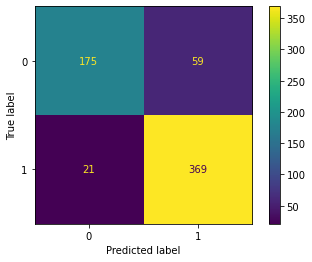

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(true_labels, predicted_labels, labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,

                              display_labels=[0,1])

disp.plot()


plt.show()

20/20 [==============================] - 3s 151ms/step


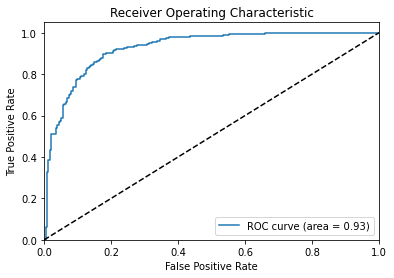

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

probsForROC=trained_model.predict(features)[:, 1]

fpr, tpr, thresholds = roc_curve(labels, probsForROC)

auc_score = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
